## Preprcessing and import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
from scipy import stats

In [2]:
sns.set_theme()

In [3]:
pd.read_csv("./dataset_finale.csv", nrows=0).columns[1:]

Index(['titolo', 'durata', 'views', 'n_comments', 'n_like', 'genere',
       'subscribers', 'publ', 'max_quality', 'timedelta', 'score', 'class'],
      dtype='object')

In [4]:
dataset = pd.read_csv("./dataset_finale.csv", 
                      usecols=['views', 'n_comments', 'n_like','subscribers', "score", 'class']
                     )

In [5]:
dataset[['views', 'n_comments', 'n_like','subscribers']] = dataset[['views', 'n_comments', 'n_like','subscribers']] + 1

In [6]:
dataset.columns = [str.capitalize(name).replace("_", " ") for name in dataset.columns]
dataset.columns

Index(['Views', 'N comments', 'N like', 'Subscribers', 'Score', 'Class'], dtype='object')

In [7]:
dataset.columns[2:5]

Index(['N like', 'Subscribers', 'Score'], dtype='object')

## Single variable histograms

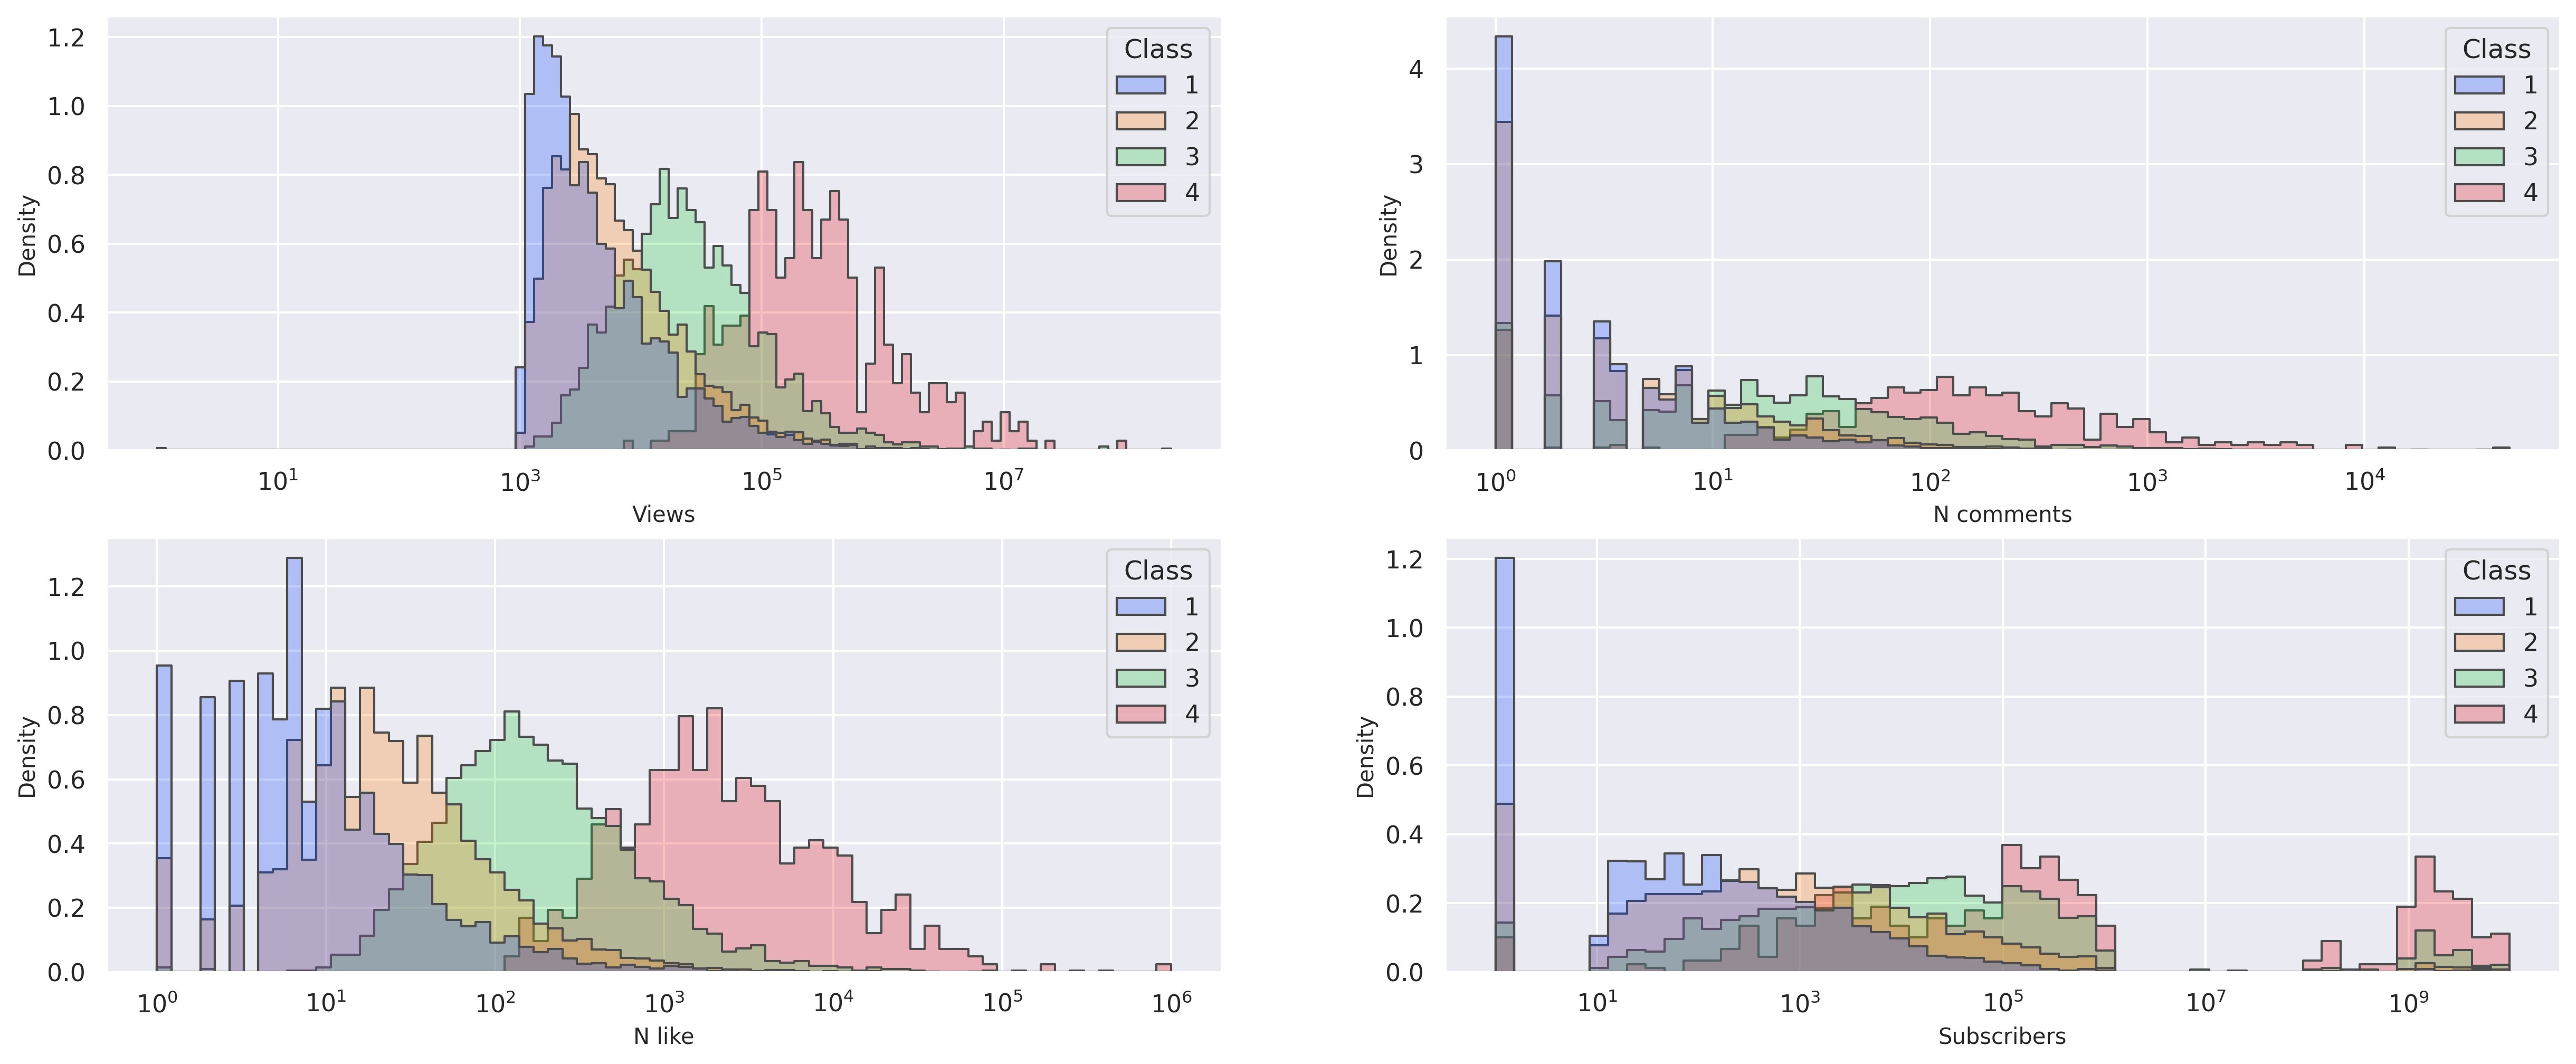

In [321]:
fig, axes = plt.subplots(ncols=2, nrows=2, dpi=300, figsize=(20,8))
for i, col_name in enumerate(dataset.columns[:-2]):
  hist = sns.histplot(
    dataset, 
    x=col_name,
    hue='Class', 
    # multiple="stack",
    # y = "N comments",
    # bins = 50,
    # linewidth=1.5,
    edgecolor=".3",
    log_scale=True, 
    stat="density", 
    palette=sns.color_palette("bright")[:4],
    element="step",
    common_norm=False,
    ax=axes.flatten()[i]
  )
fig.savefig('histograms.png', dpi=200, bbox_inches="tight")

## Scatterplots

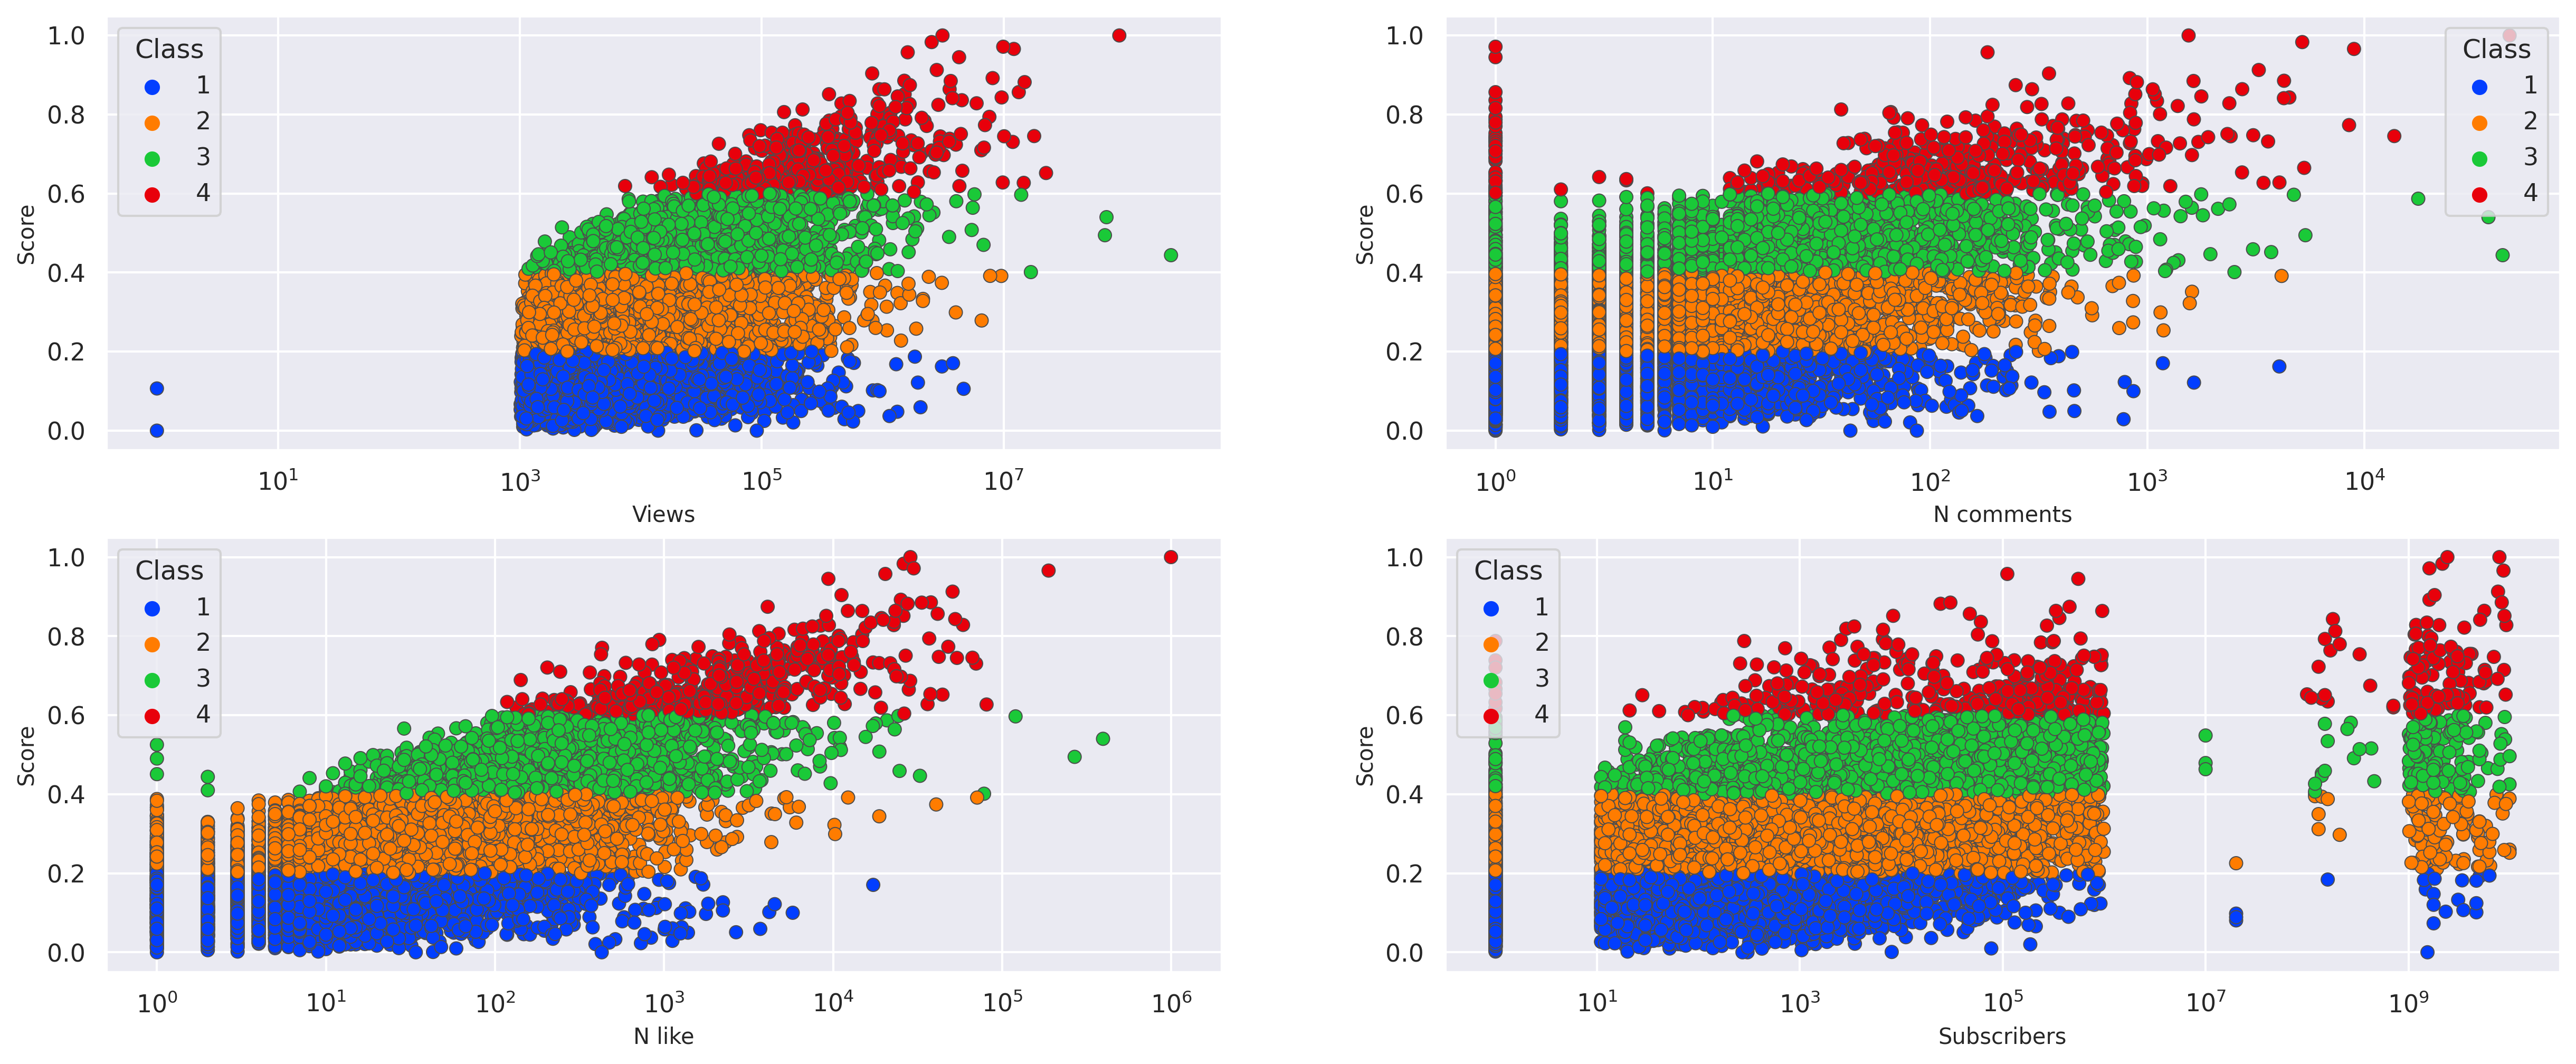

In [323]:
fig, axes = plt.subplots(ncols=2, nrows=2, dpi=300, figsize=(20,8))
for i, col_name in enumerate(dataset.columns[:-2]):
  plot = sns.scatterplot(
    data=dataset, 
    y="Score",
    x=col_name,
    hue='Class',
    edgecolor=".3",
    # log_scale=True, 
    palette=sns.color_palette("bright")[:4],
    ax=axes.flatten()[i]
              )
  plot.axes.semilogx()
fig.savefig('scatter.png', dpi=200, bbox_inches="tight")